### Decision Tree Regression - Life Expectancy Data

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.impute import KNNImputer

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

#### Problem statement

In [ ]:
Problem Statement: 
* This is a "Life Expectancy Data" with different parametrs like.
* Dataset having 2938 rows and 22 columns

Independant Variables: Country, Year,Status,Adult Mortality,
       infant deaths,Alcohol,percentage expenditure,Hepatitis,
       Measles ,BMI ,under-five deaths,Polio, Total expenditure,
       Diphtheria,HIV/AIDS,GDP,Population, thinness  1-19 years,thinness 5-9 years,
       Income composition of resources,Schooling
Dpendant Variables:  'Life expectancy'

#### Data Gathering

In [2]:
df = pd.read_csv("Life_Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### EDA

In [3]:
# INformation of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
df.columns = [col.strip().replace(' ','_') for col in df.columns]
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness__1-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [7]:
# Mathematical Information of data
df.describe()

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [8]:
df.shape # size of dataset

(2938, 22)

In [9]:
# Converting catogorical data into Continuous

new_df = pd.get_dummies(df, drop_first=True, dtype = 'int')
new_df

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,...,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,0,0,0,0,0,0,0,0,0,1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,0,0,0,0,0,0,0,0,0,1
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,0,0,0,0,0,0,0,0,0,1
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,0,0,0,0,0,0,0,0,0,1
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,...,0,0,0,0,0,0,0,0,1,1
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,...,0,0,0,0,0,0,0,0,1,1
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,...,0,0,0,0,0,0,0,0,1,1
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,...,0,0,0,0,0,0,0,0,1,1


In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Columns: 213 entries, Year to Status_Developing
dtypes: float64(16), int32(193), int64(4)
memory usage: 2.6 MB


In [11]:
# Finding missing values
new_df.isna().sum()

Year                   0
Life_expectancy       10
Adult_Mortality       10
infant_deaths          0
Alcohol              194
                    ... 
Country_Viet Nam       0
Country_Yemen          0
Country_Zambia         0
Country_Zimbabwe       0
Status_Developing      0
Length: 213, dtype: int64

In [12]:
# Handling missing values with KNN Imputer

knn_imputer = KNNImputer(n_neighbors = 3)
array1 = knn_imputer.fit_transform(new_df)
clean_df = pd.DataFrame(array1,columns = new_df.columns)
clean_df.head()

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,...,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developing
0,2015.0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2014.0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2013.0,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2012.0,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2011.0,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### 4. Feature Selection

In [ ]:
Embedded Method: 
    Tree Based model Feature Importance

In [17]:
np.around(dt_reg.feature_importances_,3)

array([0.007, 0.143, 0.007, 0.005, 0.001, 0.003, 0.002, 0.03 , 0.   ,
       0.002, 0.004, 0.002, 0.583, 0.002, 0.002, 0.004, 0.011, 0.164,
       0.013, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   ,
       0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   ,

### 5. Model Training

In [14]:
x = clean_df.drop('Life_expectancy', axis = 1)
y = clean_df['Life_expectancy']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=0)
x_train.shape

(2203, 212)

In [15]:
x_test.shape

(735, 212)

In [21]:
dt_reg = DecisionTreeRegressor(random_state = 1)
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=1)

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (212,) and arg 3 with shape (22,).

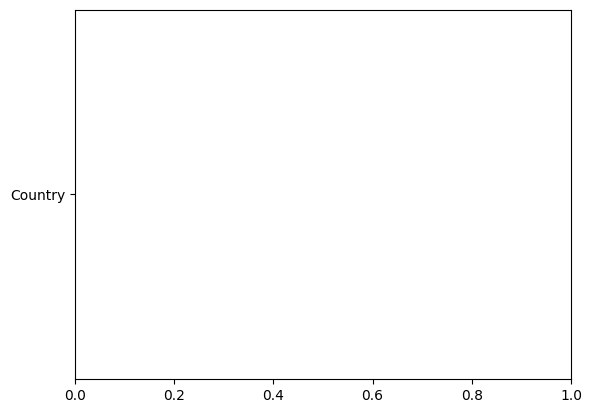

In [25]:
# Assuming dt_reg is your decision tree regressor
#feature_importances = dt_reg.feature_importances_

# Create a horizontal bar plot
plt.barh(df.columns, dt_reg.feature_importances_, align='center')

plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importance')

plt.show()

### 6. Model Evaluation 

In [22]:
print('Training Data Evaluation')

y_pred_train = dt_reg.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print('MAE :',mae)

r2_value = r2_score(y_train, y_pred_train)
print("R-squared Value :",r2_value)

Training Data Evaluation
MSE : 0.0
RMSE : 0.0
MAE : 0.0
R-squared Value : 1.0


In [11]:
print('Testing Data Evaluation')
y_pred = dt_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE :',mae)

r2_value = r2_score(y_test, y_pred)
print("R-squared Value :",r2_value)

Testing Data Evaluation
MSE : 7.751020408163265
RMSE : 2.784065446099151
MAE : 1.658684807256236
R-squared Value : 0.9173261463484335


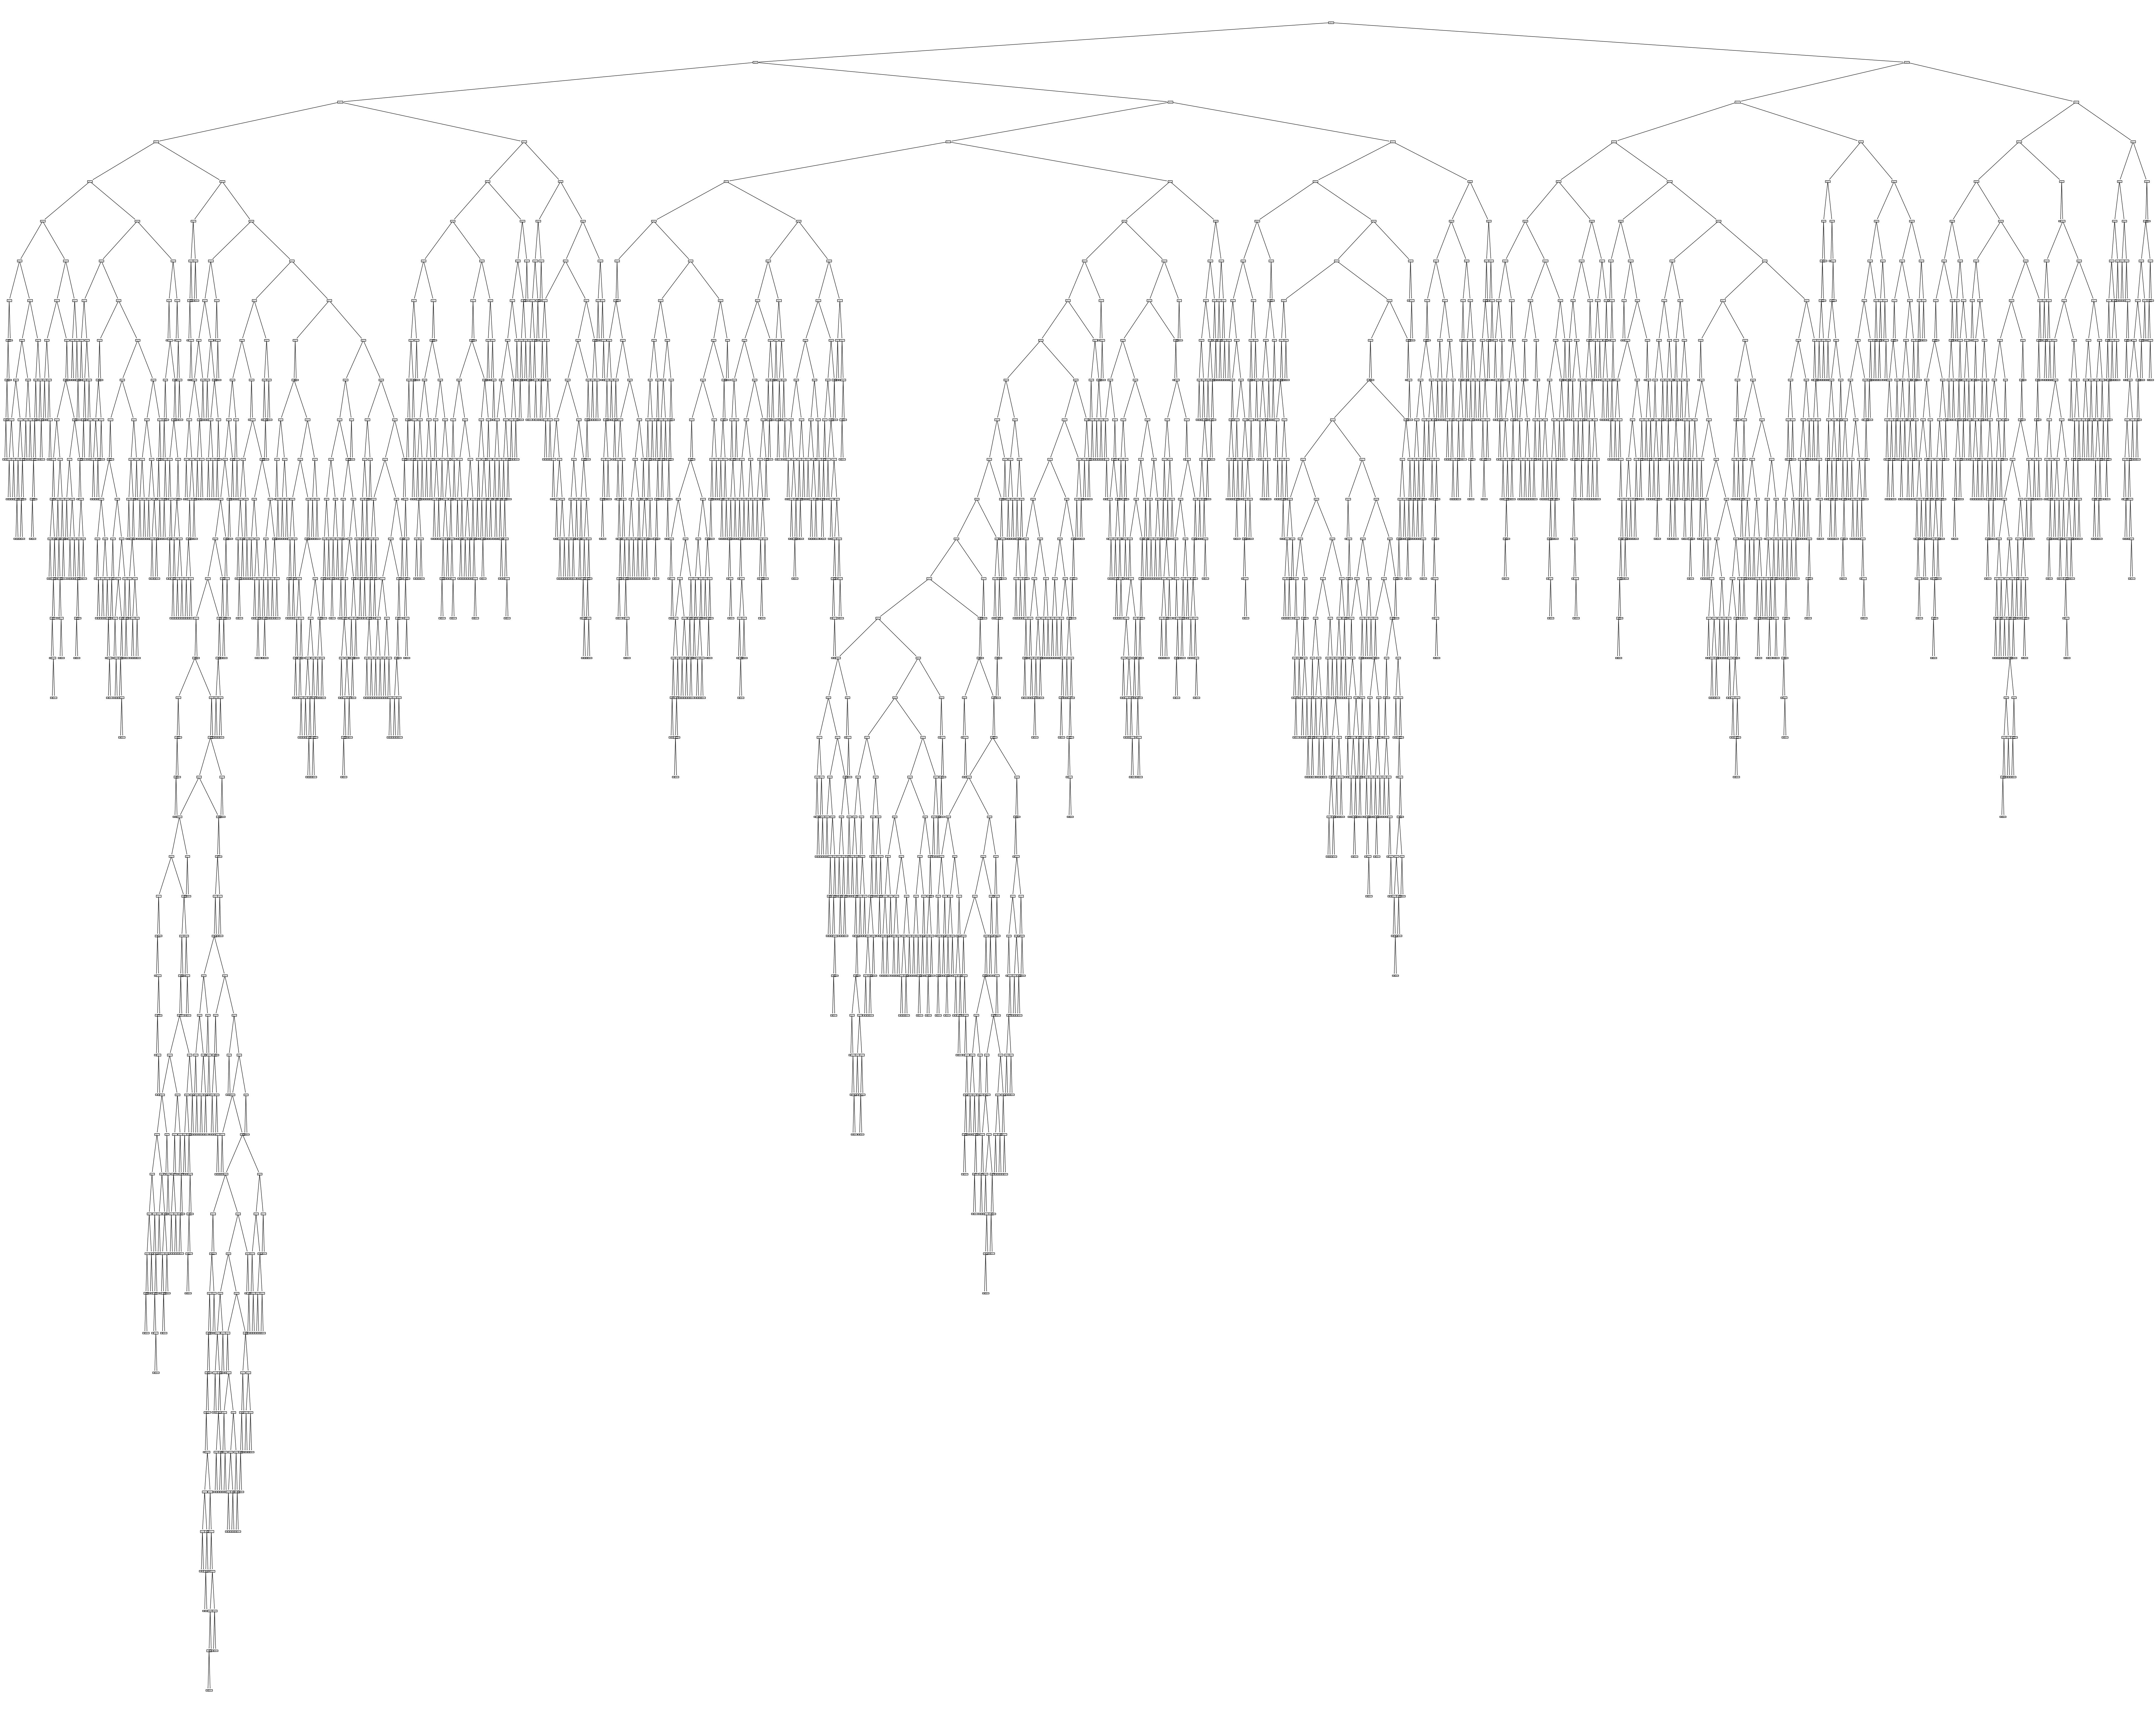

In [23]:
plt.figure(figsize=(100,80))
plot_tree(dt_reg)
plt.savefig('DT_Reg.jpg')

### Hyperparameter Tuning

In [12]:
dt_reg = DecisionTreeRegressor(random_state=0)
hyp_grid = {"criterion" : ['squared_error','absolute_error'],
            "max_depth" : np.arange(5,10),
            "min_samples_split" : range(10,15),
            "min_samples_leaf" : range(5,10)}

gscv_dt_reg = GridSearchCV(dt_reg, hyp_grid , cv = 4, n_jobs=-1)
gscv_dt_reg.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': array([5, 6, 7, 8, 9]),
                         'min_samples_leaf': range(5, 10),
                         'min_samples_split': range(10, 15)})

In [13]:
gscv_dt_reg.best_estimator_

DecisionTreeRegressor(max_depth=9, min_samples_leaf=5, min_samples_split=10,
                      random_state=0)

In [14]:
# Train Data Evaluation
dt_reg = gscv_dt_reg.best_estimator_
dt_reg.fit(x_train, y_train)

r2_value = r2_score(y_train, y_pred_train)
print("R-squared Value :",r2_value)

R-squared Value : 1.0


In [15]:
# Test Data Evaluation
y_pred = dt_reg.predict(x_test)

r2_value = r2_score(y_test, y_pred)
print("R-squared Value :",r2_value)

R-squared Value : 0.9247084712952038


In [32]:
# plt.figure(figsize=(100,80))
# plot_tree(dt_reg, feature_names=x.columns, filled=True)
# plt.savefig('DT_Reg_hyp.jpg')

### Pruning

In [26]:
dt_reg = DecisionTreeRegressor(random_state=0)
dt_reg.fit(x_train,y_train)
ccp_alpha_values = dt_reg.cost_complexity_pruning_path(x_train, y_train)['ccp_alphas']


In [63]:
# ccp_alpha_values

In [35]:
train_result = [] 
test_result = []

for ccp_alpha in ccp_alpha_values:
    dt_reg_pruning = DecisionTreeRegressor(random_state=0, ccp_alpha = ccp_alpha)
    dt_reg_pruning.fit(x_train, y_train)
    train_result.append(dt_reg_pruning.score(x_train, y_train))
    test_result.append(dt_reg_pruning.score(x_test, y_test))

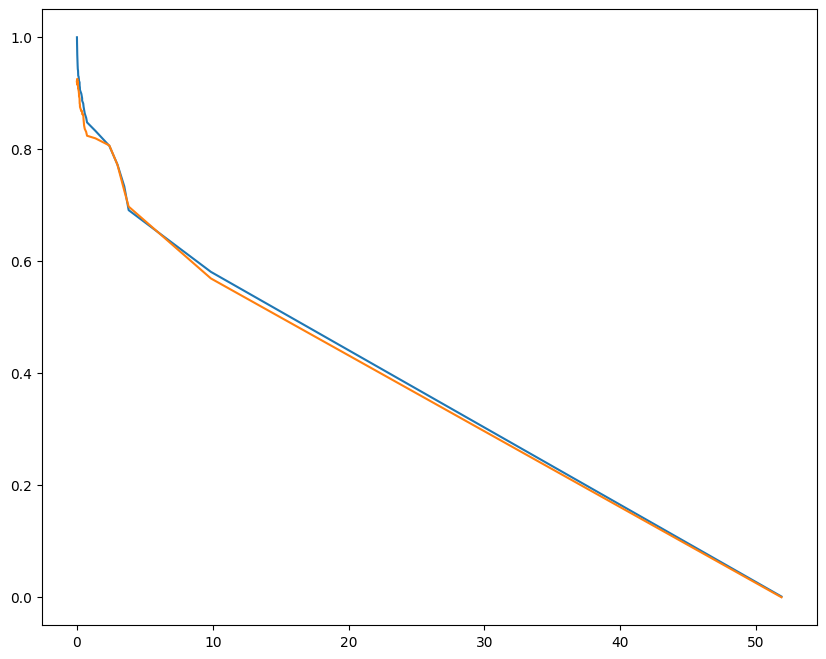

In [36]:
plt.figure(figsize = (10,8))
plt.plot(ccp_alpha_values, train_result)
plt.plot(ccp_alpha_values, test_result)

In [27]:
dt_reg = DecisionTreeRegressor(random_state=0,ccp_alpha=ccp_alpha_values[10])
dt_reg.fit(x_train,y_train)
print('Train Accuracy :',dt_reg.score(x_train, y_train))
print("Test Accuracy  :",dt_reg.score(x_test, y_test))

Train Accuracy : 1.0
Test Accuracy  : 0.9217251796460899


In [28]:

import pickle

with open("Decision_tree_life.pkl",'wb') as f:
    pickle.dump(dt_reg,f) 

AttributeError: 'DecisionTreeRegressor' object has no attribute 'columns'

In [29]:
x_train

,Year,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,...,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developing
2230,2002.0,226.0,0.0,5.80,50.801814,98.333333,0.0,21.7,0.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2011.0,275.0,71.0,0.01,7.097109,68.000000,3013.0,17.2,97.0,68.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1530,2007.0,24.0,0.0,13.40,1581.511914,96.000000,0.0,59.0,0.0,95.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1005,2004.0,86.0,3.0,11.83,5842.374765,88.000000,121.0,57.1,3.0,96.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2293,2003.0,185.0,0.0,7.41,843.118666,99.000000,0.0,28.7,0.0,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,2005.0,318.0,2.0,1.23,12.703259,39.333333,298.0,3.2,2.0,71.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
835,2014.0,32.0,3.0,0.01,13.404774,2.000000,13.0,24.0,4.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1653,2013.0,28.0,8.0,0.01,8.880281,8.000000,62.0,29.4,12.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2607,2009.0,165.0,2.0,0.09,36.199487,72.000000,10.0,15.1,3.0,78.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [30]:
new_df

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,...,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,0,0,0,0,0,0,0,0,0,1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,0,0,0,0,0,0,0,0,0,1
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,0,0,0,0,0,0,0,0,0,1
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,0,0,0,0,0,0,0,0,0,1
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,...,0,0,0,0,0,0,0,0,1,1
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,...,0,0,0,0,0,0,0,0,1,1
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,...,0,0,0,0,0,0,0,0,1,1
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,...,0,0,0,0,0,0,0,0,1,1
